In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np    

In [77]:
def readData(filename):
    df=pd.read_csv(filename)
    return df.values#this returns an array
x=readData('./linearX.csv')
y=readData('./linearY.csv')

In [78]:
print(x)

[[ 8. ]
 [ 9.1]
 [ 8.4]
 [ 6.9]
 [ 7.7]
 [15.6]
 [ 7.3]
 [ 7. ]
 [ 7.2]
 [10.1]
 [11.5]
 [ 7.1]
 [10. ]
 [ 8.9]
 [ 7.9]
 [ 5.6]
 [ 6.3]
 [ 6.7]
 [10.4]
 [ 8.5]
 [ 7.4]
 [ 6.3]
 [ 5.4]
 [ 8.9]
 [ 9.4]
 [ 7.5]
 [11.9]
 [ 7.8]
 [ 7.4]
 [10.8]
 [10.2]
 [ 6.2]
 [ 7.7]
 [13.7]
 [ 8. ]
 [ 6.7]
 [ 6.7]
 [ 7. ]
 [ 8.3]
 [ 7.4]
 [ 9.9]
 [ 6.1]
 [ 7. ]
 [ 5.4]
 [10.7]
 [ 7.6]
 [ 8.9]
 [ 9.2]
 [ 6.6]
 [ 7.2]
 [ 8. ]
 [ 7.8]
 [ 7.9]
 [ 7. ]
 [ 7. ]
 [ 7.6]
 [ 9.1]
 [ 9. ]
 [ 7.9]
 [ 6.6]
 [11.9]
 [ 6.5]
 [ 7.1]
 [ 8.8]
 [ 7.5]
 [ 7.7]
 [ 6. ]
 [10.6]
 [ 6.6]
 [ 8.2]
 [ 7.9]
 [ 7.1]
 [ 5.6]
 [ 6.4]
 [ 7.5]
 [ 9.8]
 [ 7. ]
 [10.5]
 [ 7.1]
 [ 6.2]
 [ 6.5]
 [ 7.7]
 [ 7.2]
 [ 9.3]
 [ 8.5]
 [ 7.7]
 [ 6.8]
 [ 7.8]
 [ 8.7]
 [ 9.6]
 [ 7.2]
 [ 9.3]
 [ 8.1]
 [ 6.6]
 [ 7.8]
 [10.2]
 [ 6.1]
 [ 7.3]
 [ 7.3]]


In [16]:
print(x.shape)

(99, 1)


In [79]:
x=x.reshape(99,)
y=y.reshape(99,)
print(x)

[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]


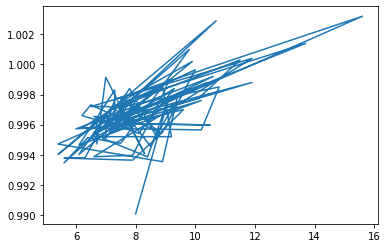

In [80]:
## plot
plt.plot(x,y)

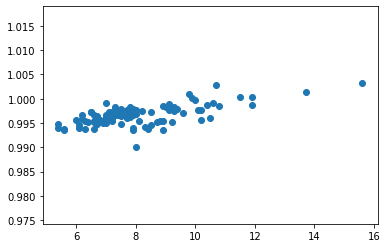

In [81]:
plt.scatter(x,y)

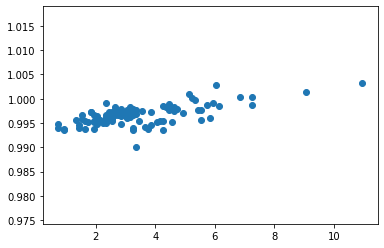

In [82]:
# Normalisation:mean=0,standard deviation=1
x=x-x.mean()/x.std()
plt.scatter(x,y)

# Algorithm Linear Regression


In [90]:
X=x
Y=y
def hypothesis(theta,x):
    return theta[0]+theta[1]*x
def error(X,Y,theta):
    total_error=0
    m=x.shape[0]
    for i in range(m):
        total_error+=(Y[i]-hypothesis(theta,X[i]))**2
    return .5*total_error
def gradient(Y,X,theta):
    grad=np.array([0.0,0.0])
    m=X.shape[0]
    for i in range(m):
        grad[0] += -1*(Y[i]-hypothesis(theta,X[i]))
        grad[1] += -1*(Y[i]-hypothesis(theta,X[i])*X[i])
    return grad    
        
def gradientDesent(X,Y,learning_rate,maxItr):
    grad=np.array([0.0,0.0])
    theta=np.array([0.0,0.0])
    e=[]
    for i in range(maxItr):
        grad=gradient(X,Y,theta)
        ce=error(x,y,theta)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        e.append(ce)
    return theta,e

theta,e=gradientDesent(X,Y,learning_rate=0.001,maxItr=500)
print(theta)

    

[1.42294119 1.98320715]


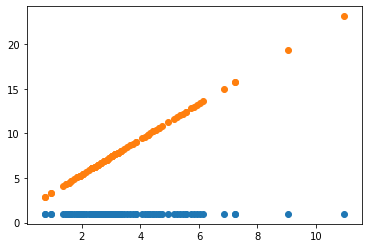

In [88]:
plt.scatter(x,y)
plt.scatter(x,hypothesis(theta,x))
plt.show()

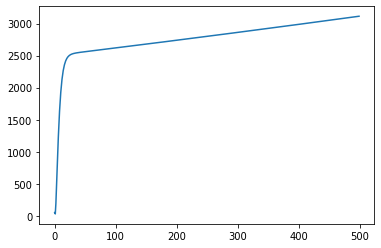

In [89]:
plt.plot(e)